In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
parks = gpd.read_file('../data/Metro_Parks.geojson')
water = gpd.read_file('../data/Public_Water_Systems.geojson')
print(parks.crs)
parks.head()

epsg:4326


,acres,name,year_estab,common_nam,status,address,lon,lat,descriptio,geometry
0,69.86,Harpeth River Park,1988,Harpeth River,PARK,7820 Coley Davis Rd,-86.9592214,36.07738249,Harpeth River State Park has much historical a...,"MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ..."
1,9.88,Harpeth Knoll Park,1972,Harpeth Knoll,PARK,708 Goodpasture Terrace,-86.93815537,36.05942777,"Huge grassy field with playground, and shade s...","MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ..."
2,17.14,Bellevue Park,1982,Red Caboose,PARK,656 Colice Jeanne Rd,-86.93354496,36.07159731,"Bellevue Park, known as Red Caboose Park, is p...","MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ..."
3,809.59,Bells Bend Park,2007,Bells Bend,PARK,4187 Old Hickory Blvd,-86.92646294,36.15016925,"Located in western Davidson County, this park ...","MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ..."
4,2168.792,Alvin G. Beaman Park,1996,Beaman,PARK,5911 Old Hickory Blvd.,-86.91984207,36.26075833,Beaman Park provides education and awareness p...,"MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ..."


In [3]:
print(water.crs)
water.head()

epsg:4326


,name,location,dog,objectid,lon,ada,cnt,lat,feat_type,geometry
0,Beaman Water Fountain,None,Y,45921,36.26250456,Y,1,-86.89425346,Fountain/Bottle filler/ADA,POINT (-86.89425 36.26250)
1,Edwin Nature Center Water Fountain,Restrooms Breezeway,N,45937,36.06089915,Y,1,-86.90622747,Bottle Filler/ADA,POINT (-86.90623 36.06090)
2,Percy Warner Belle Meade Gates Water Fountain,Belle Meade Gates,Y,45964,36.08310102,Y,1,-86.86727566,ADA Bowl,POINT (-86.86728 36.08310)
3,West Park Water Fountain,Ballfield,N,45992,36.16179583,N,1,-86.86378994,Single with foot pedal,POINT (-86.86379 36.16180)
4,Richland Park Water Fountain,Playground,N,46012,36.15139384,N,1,-86.84589094,Single with foot pedal,POINT (-86.84589 36.15139)


In [4]:
type(parks)

geopandas.geodataframe.GeoDataFrame

In [5]:
type(water)

geopandas.geodataframe.GeoDataFrame

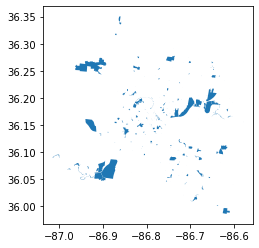

In [6]:
parks.plot();

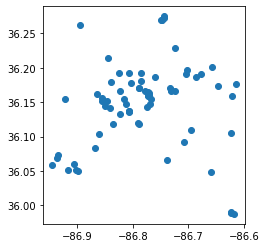

In [7]:
water.plot();

In [8]:
parks = parks[['name', 'acres', 'geometry']]
parks.head()

,name,acres,geometry
0,Harpeth River Park,69.86,"MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ..."
1,Harpeth Knoll Park,9.88,"MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ..."
2,Bellevue Park,17.14,"MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ..."
3,Bells Bend Park,809.59,"MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ..."
4,Alvin G. Beaman Park,2168.792,"MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ..."


In [9]:
water_at_parks = gpd.sjoin(water, parks, op = 'within')
water_at_parks.head()

,name_left,location,dog,objectid,lon,ada,cnt,lat,feat_type,geometry,index_right,name_right,acres
0,Beaman Water Fountain,None,Y,45921,36.26250456,Y,1,-86.89425346,Fountain/Bottle filler/ADA,POINT (-86.89425 36.26250),4,Alvin G. Beaman Park,2168.792
1,Edwin Nature Center Water Fountain,Restrooms Breezeway,N,45937,36.06089915,Y,1,-86.90622747,Bottle Filler/ADA,POINT (-86.90623 36.06090),5,Edwin Warner Park,1113.12
29,Edwin Warner Dog Park Water Fountain,Dog Park,Y,46595,36.05195562,N,1,-86.90162012,Dog Only,POINT (-86.90162 36.05196),5,Edwin Warner Park,1113.12
30,Edwin Warner Concession Water Fountain,WNSL Concessions,N,46597,36.04998346,Y,1,-86.8981744,Standard/ADA,POINT (-86.89817 36.04998),5,Edwin Warner Park,1113.12
69,Harpeth River Greenway,Butler Field Trail Head,Y,0,36.05133033,N,1,-86.91617134,Standard/ADA/Bottle Filler,POINT (-86.91617 36.05133),5,Edwin Warner Park,1113.12


In [10]:
water_at_parks.shape

(61, 13)

In [11]:
water_at_parks = water_at_parks.rename(columns = {'name_left': 'water_name', 'name_right': 'park'})
water_at_parks.head()

,water_name,location,dog,objectid,lon,ada,cnt,lat,feat_type,geometry,index_right,park,acres
0,Beaman Water Fountain,None,Y,45921,36.26250456,Y,1,-86.89425346,Fountain/Bottle filler/ADA,POINT (-86.89425 36.26250),4,Alvin G. Beaman Park,2168.792
1,Edwin Nature Center Water Fountain,Restrooms Breezeway,N,45937,36.06089915,Y,1,-86.90622747,Bottle Filler/ADA,POINT (-86.90623 36.06090),5,Edwin Warner Park,1113.12
29,Edwin Warner Dog Park Water Fountain,Dog Park,Y,46595,36.05195562,N,1,-86.90162012,Dog Only,POINT (-86.90162 36.05196),5,Edwin Warner Park,1113.12
30,Edwin Warner Concession Water Fountain,WNSL Concessions,N,46597,36.04998346,Y,1,-86.8981744,Standard/ADA,POINT (-86.89817 36.04998),5,Edwin Warner Park,1113.12
69,Harpeth River Greenway,Butler Field Trail Head,Y,0,36.05133033,N,1,-86.91617134,Standard/ADA/Bottle Filler,POINT (-86.91617 36.05133),5,Edwin Warner Park,1113.12


In [12]:
type(water_at_parks)

geopandas.geodataframe.GeoDataFrame

In [13]:
water_at_parks['park'].value_counts()

Riverfront Park                5
Edwin Warner Park              4
Cedar Hill                     4
Cane Ridge Park                3
Fannie Mae Dees Park           3
Shelby Park                    3
Shelby Bottoms Park            3
Sevier Park                    2
Two Rivers Park                2
McCabe Park                    2
Richland Park                  1
Centennial Park                1
Elizabeth Park                 1
Providence Park                1
William Whitfield Park         1
Isaac Litton School Park       1
Public Square Park             1
Buena Vista Park               1
Bells Bend Park                1
Percy Warner Park              1
Parmer Park                    1
West Park                      1
City Cemetery                  1
Fort Negley                    1
Bordeaux Garden Park           1
Alvin G. Beaman Park           1
Cumberland Park                1
Bellevue Park                  1
Ted Rhodes Park                1
Elmington Park                 1
Seven Oaks

In [14]:
water_in_riverfront = water_at_parks.loc[water_at_parks['park'] == 'Riverfront Park']
water_in_riverfront.shape

(5, 13)

In [15]:
polygonriverfront = parks.loc[parks['name'] == 'Riverfront Park']
polygonriverfront.shape

(4, 3)

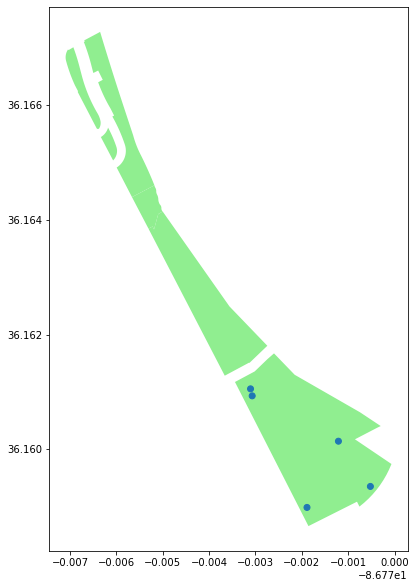

In [23]:
ax = polygonriverfront.plot(figsize = (8, 10), color = 'lightgreen')
water_in_riverfront.plot( ax = ax, column = 'park');
plt.show();

In [17]:
polygonriverfront.geometry.centroid

<ipython-input-17-12f394e94a67>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygonriverfront.geometry.centroid


53     POINT (-86.77611 36.16584)
55     POINT (-86.77530 36.16424)
59     POINT (-86.77404 36.16256)
184    POINT (-86.77175 36.16015)
dtype: geometry

In [18]:
center = polygonriverfront.geometry.centroid[59]
print(center)

#area_center = [36.163, -86.77530]

POINT (-86.77404464109055 36.16255994309812)


<ipython-input-18-da81f01d0ae0>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygonriverfront.geometry.centroid[59]


In [19]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.16255994309812, -86.77404464109055]


In [20]:
map_wp = folium.Map(location =  area_center, tiles='Stamen Terrain', zoom_start = 15)
map_wp

In [21]:
i = 0
for row_index, row_values in water_in_riverfront.iterrows():
    if i <5: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 21
values are:
 
water_name                Ascend Amphiteater Water Fountain
location                                           Building
dog                                                       N
objectid                                              46586
lon                                              36.1589887
ada                                                       N
cnt                                                       1
lat                                            -86.77188799
feat_type                        Standard/ADA/Bottle Filler
geometry       POINT (-86.77188799128072 36.15898870023951)
index_right                                             184
park                                        Riverfront Park
acres                                                 12.54
Name: 21, dtype: object
------------------------- 
index is 44
values are:
 
water_name               Ascend Fitness Area Water Fountain
location                                       Fitness Ar

In [39]:
map_wp = folium.Map(location = area_center, tiles='Stamen Terrain', zoom_start = 15)

folium.GeoJson(polygonriverfront).add_to(map_wp)

for row_index, row_values in water_in_riverfront.iterrows() :
    loc = (row_values['lon'], row_values['lat']) 
    pop = str(row_values['feat_type']) 
    icon = folium.Icon(color='blue', icon='tint')
   
    marker = folium.Marker(
        location = loc, 
        popup = pop, 
        icon = icon)
    marker.add_to(map_wp)

map_wp